In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)

In [74]:
data=pd.read_csv('../Datasets/fire_archive_NEW.csv')
print(data.shape)
for i in range(len(data)): 
    data.loc[i,'Day'] = int(data.loc[i,'acq_date'].split('-')[0])
    data.loc[i,'Month'] = int(data.loc[i,'acq_date'].split('-')[1])
    data.loc[i,'Year'] = int(data.loc[i,'acq_date'].split('-')[2])
#print(data['Day'][0])
#print(data['Month'][0])
#print(data['Year'][0])
#print(data.head())
print(data.shape)
data.head()
# data.tail()

c:\users\meeta\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(117151, 14)
(117151, 17)


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,Day,Month,Year
0,30.0915,79.5024,304.5,1.2,1.1,01-01-2016,517,Terra,MODIS,58,6.2,285.8,8.7,D,1.0,1.0,2016.0
1,31.3276,77.0032,305.0,1.8,1.3,01-01-2016,517,Terra,MODIS,49,6.2,292.2,16.1,D,1.0,1.0,2016.0
2,29.8570,80.6228,304.0,1.1,1.0,01-01-2016,518,Terra,MODIS,49,6.2,285.2,9.0,D,1.0,1.0,2016.0
3,29.9037,80.4531,344.4,1.1,1.1,01-01-2016,518,Terra,MODIS,94,6.2,289.8,60.2,D,1.0,1.0,2016.0
4,29.8945,80.4499,325.8,1.1,1.1,01-01-2016,518,Terra,MODIS,84,6.2,290.4,27.9,D,1.0,1.0,2016.0


In [75]:
date=data['acq_date']

In [76]:
data.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp,Day,Month,Year
count,117151.000000,117151.000000,117151.000000,117151.000000,117151.000000,117151.000000,117151.000000,117151.000000,117151.000000,117151.000000,117151.000000,117151.000000
mean,30.840989,74.985125,321.144938,1.361651,1.133238,797.157284,62.696119,302.248435,17.529912,15.918661,8.105172,2017.343727
std,0.996430,1.684402,10.726505,0.559207,0.183640,234.582792,16.458130,7.372490,18.399463,9.326866,3.274789,1.110870
min,29.400000,70.800100,300.000000,1.000000,1.000000,440.000000,0.000000,266.700000,2.100000,1.000000,1.000000,2016.000000
25%,30.149700,74.318000,313.800000,1.000000,1.000000,747.000000,53.000000,298.500000,8.100000,8.000000,5.000000,2016.000000
50%,30.607000,75.078100,319.000000,1.100000,1.100000,811.000000,65.000000,301.400000,12.500000,16.000000,10.000000,2017.000000
75%,31.325900,75.822000,328.300000,1.500000,1.200000,824.000000,74.000000,305.100000,20.400000,25.000000,11.000000,2018.000000
max,35.799500,80.699600,427.700000,4.800000,2.000000,2159.000000,100.000000,331.700000,1104.700000,31.000000,12.000000,2019.000000


In [78]:
Aggregation={'latitude':'mean','longitude':'mean','brightness':'mean','scan':'mean','track':'mean','acq_time':'mean','confidence':'mean','bright_t31':'mean','frp':'mean'}
data_final=pd.DataFrame()
data_final=data.groupby(['Year','Month','Day','acq_date']).agg(Aggregation).reset_index()
# a["acq_date"] = data["acq_date"]
data_final.head()
#type(a['acq_date'][0])


,Year,Month,Day,acq_date,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp
0,2016.0,1.0,1.0,01-01-2016,31.258585,73.542217,310.346341,1.114634,1.046341,821.512195,59.609756,293.568293,10.341463
1,2016.0,1.0,2.0,02-01-2016,31.108153,72.678637,306.000000,1.313333,1.103333,710.366667,58.300000,287.846667,13.253333
2,2016.0,1.0,3.0,03-01-2016,31.202693,75.962917,308.843103,1.222414,1.084483,807.017241,58.500000,291.356897,12.436207
3,2016.0,1.0,4.0,04-01-2016,30.361394,72.666141,307.347059,1.476471,1.205882,610.411765,56.764706,288.376471,13.805882
4,2016.0,1.0,5.0,05-01-2016,30.755435,76.612978,307.998039,1.219608,1.066667,795.039216,60.450980,293.150980,9.107843


In [79]:
data_final.shape

(1313, 13)

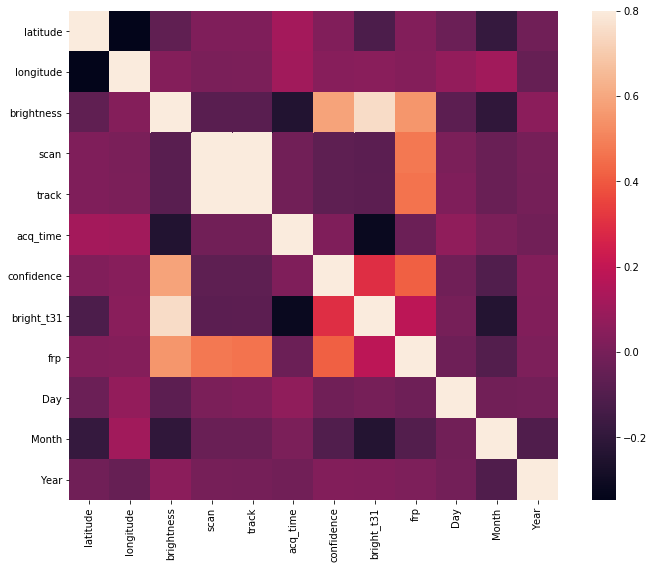

,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp,Day,Month,Year
latitude,1.000000,-0.347481,-0.061148,0.022640,0.021092,0.118952,0.025842,-0.114478,0.029421,-0.031256,-0.184458,-0.018096
longitude,-0.347481,1.000000,0.036683,0.010585,0.011144,0.111612,0.043421,0.051367,0.033722,0.074035,0.113299,-0.043849
brightness,-0.061148,0.036683,1.000000,-0.080106,-0.079640,-0.244271,0.587364,0.753797,0.552925,-0.072452,-0.200847,0.055634
scan,0.022640,0.010585,-0.080106,1.000000,0.977259,-0.012254,-0.069462,-0.074163,0.476935,0.011736,-0.034637,-0.001224
track,0.021092,0.011144,-0.079640,0.977259,1.000000,-0.012335,-0.069336,-0.070696,0.461916,0.022774,-0.037125,-0.004554
acq_time,0.118952,0.111612,-0.244271,-0.012254,-0.012335,1.000000,0.023357,-0.319777,-0.031079,0.066072,0.011593,-0.013604
confidence,0.025842,0.043421,0.587364,-0.069462,-0.069336,0.023357,1.000000,0.297205,0.415968,-0.019557,-0.103289,0.031745
bright_t31,-0.114478,0.051367,0.753797,-0.074163,-0.070696,-0.319777,0.297205,1.000000,0.184791,0.000395,-0.238658,0.027547
frp,0.029421,0.033722,0.552925,0.476935,0.461916,-0.031079,0.415968,0.184791,1.000000,-0.024127,-0.099236,0.016873
Day,-0.031256,0.074035,-0.072452,0.011736,0.022774,0.066072,-0.019557,0.000395,-0.024127,1.000000,-0.014281,-0.010462


In [80]:
cormat=data.corr()
fig=plt.figure(figsize =(12,9))
sns.heatmap(cormat,vmax=.8,square=True)
plt.show()
cormat

In [81]:
Adata=data[['latitude','longitude','brightness'  ,'scan' , 'track','acq_time','confidence',  'version' , 'bright_t31'  , 'frp' ,'Day' , 'Month','Year']]
Adata.head()


,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,Day,Month,Year
0,30.0915,79.5024,304.5,1.2,1.1,517,58,6.2,285.8,8.7,1.0,1.0,2016.0
1,31.3276,77.0032,305.0,1.8,1.3,517,49,6.2,292.2,16.1,1.0,1.0,2016.0
2,29.8570,80.6228,304.0,1.1,1.0,518,49,6.2,285.2,9.0,1.0,1.0,2016.0
3,29.9037,80.4531,344.4,1.1,1.1,518,94,6.2,289.8,60.2,1.0,1.0,2016.0
4,29.8945,80.4499,325.8,1.1,1.1,518,84,6.2,290.4,27.9,1.0,1.0,2016.0


In [82]:
br=data['brightness']
br_31=data['bright_t31']
mon=data['Month']
con=data['confidence']
pwr=data['frp']
print(br.shape)
print(br_31.shape)
print(mon.shape)
print(con.shape)

(117151,)
(117151,)
(117151,)
(117151,)


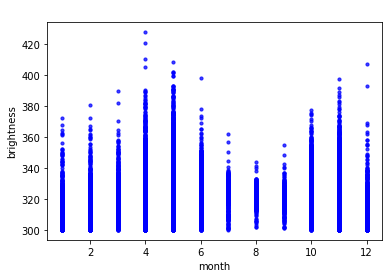

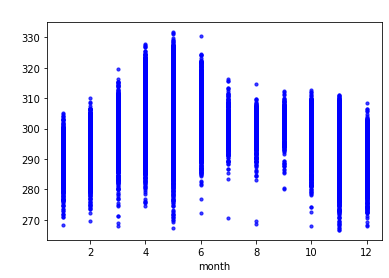

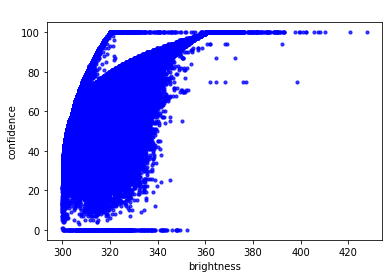

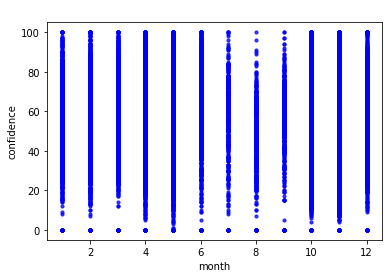

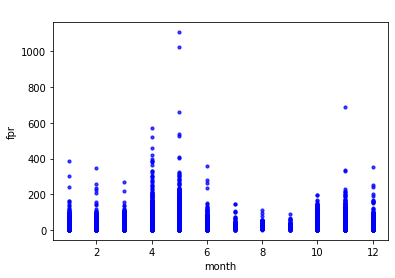

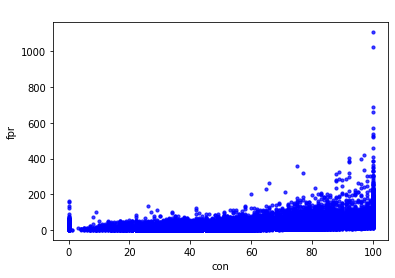

In [83]:
def scatterplot(y2,y1,x_label=" ",y_label=" ",title=" ",color="b",yscale_log=False):
    _, ax=plt.subplots()
    ax.scatter(y2,y1,s=10, color = color, alpha=0.75)
    
    if yscale_log==True:
        ax.set_yscale('log')
        
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

scatterplot(mon,br,'month','brightness')
scatterplot(mon,br_31,'month')
scatterplot(br,con,'brightness','confidence')
scatterplot(mon,con,'month','confidence')
scatterplot(mon,pwr,'month','fpr')
scatterplot(con,pwr,'con','fpr')

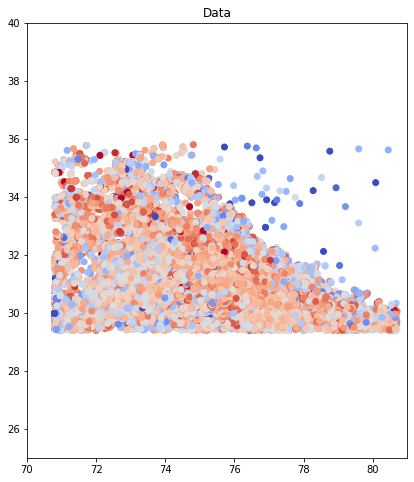

In [84]:
plt.figure(figsize=(15, 8))

ax = plt.subplot(1,2,2)
ax.set_title("Data")

ax.set_autoscaley_on(False)
ax.set_ylim([25, 40])
ax.set_autoscalex_on(False)
ax.set_xlim([70, 81])
plt.scatter(data["longitude"],
            data["latitude"],
            cmap="coolwarm",
            c=data["confidence"] / data["confidence"].max())
_ = plt.plot()

In [85]:
columns = np.full((cormat.shape[0],), True, dtype=bool)
for i in range(cormat.shape[0]):
    for j in range(i+1, cormat.shape[0]):
        if cormat.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
selected_columns = ['latitude','longitude','brightness'  ,'scan' , 'acq_time','confidence',  'version' , 'bright_t31'  , 'frp' ,'Day' , 'Month','Year']

data = Adata[['latitude','longitude','brightness'  ,'scan' , 'acq_time','confidence',  'version' , 'bright_t31'  , 'frp' ,'Day' , 'Month','Year']]

data['acq_date']=date

data.head()

,latitude,longitude,brightness,scan,acq_time,confidence,version,bright_t31,frp,Day,Month,Year,acq_date
0,30.0915,79.5024,304.5,1.2,517,58,6.2,285.8,8.7,1.0,1.0,2016.0,01-01-2016
1,31.3276,77.0032,305.0,1.8,517,49,6.2,292.2,16.1,1.0,1.0,2016.0,01-01-2016
2,29.8570,80.6228,304.0,1.1,518,49,6.2,285.2,9.0,1.0,1.0,2016.0,01-01-2016
3,29.9037,80.4531,344.4,1.1,518,94,6.2,289.8,60.2,1.0,1.0,2016.0,01-01-2016
4,29.8945,80.4499,325.8,1.1,518,84,6.2,290.4,27.9,1.0,1.0,2016.0,01-01-2016


In [86]:
l=list(selected_columns)
l.remove('confidence')
features=data[l]
print(features.head())
target = pd.DataFrame()
target=data[['confidence']]
print(target.head())
target.describe()

   latitude  longitude  brightness  scan  acq_time version  bright_t31   frp  \
0   30.0915    79.5024       304.5   1.2       517     6.2       285.8   8.7   
1   31.3276    77.0032       305.0   1.8       517     6.2       292.2  16.1   
2   29.8570    80.6228       304.0   1.1       518     6.2       285.2   9.0   
3   29.9037    80.4531       344.4   1.1       518     6.2       289.8  60.2   
4   29.8945    80.4499       325.8   1.1       518     6.2       290.4  27.9   

   Day  Month    Year  
0  1.0    1.0  2016.0  
1  1.0    1.0  2016.0  
2  1.0    1.0  2016.0  
3  1.0    1.0  2016.0  
4  1.0    1.0  2016.0  
   confidence
0          58
1          49
2          49
3          94
4          84


,confidence
count,117151.000000
mean,62.696119
std,16.458130
min,0.000000
25%,53.000000
50%,65.000000
75%,74.000000
max,100.000000


In [87]:
for i in target.index:
    if target['confidence'][i]<=40:
        target.at[i, 'confidence'] = 0
    elif target['confidence'][i]<=65:
        target.at[i, 'confidence'] = 1
    else:
        target.at[i, 'confidence'] = 2

In [88]:
target['confidence']
target.describe()

,confidence
count,117151.000000
mean,1.371102
std,0.661220
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


TypeError: '<' not supported between instances of 'str' and 'float'

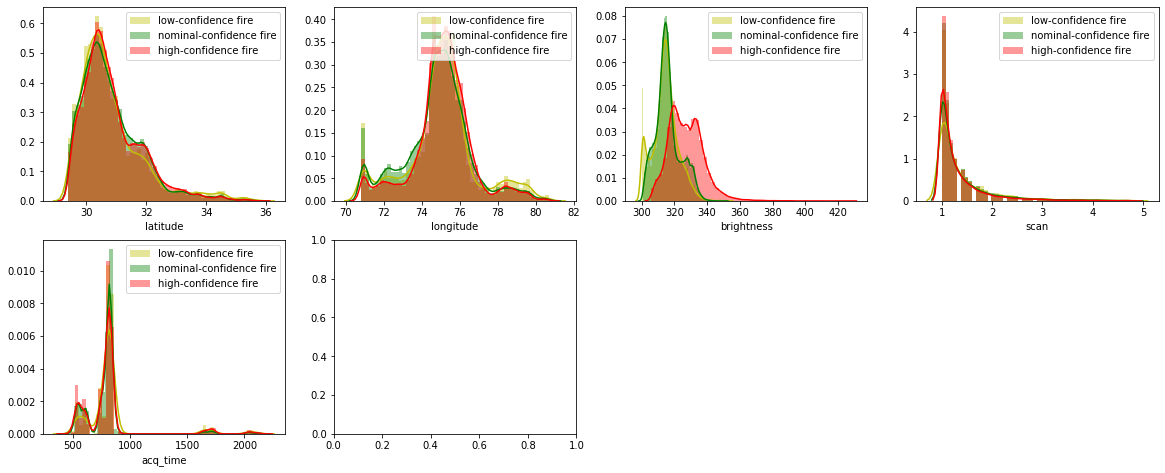

In [90]:
# type(features['version'][0])

fig = plt.figure(figsize = (20, 25))
j = 0
for i in features.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(features[i][target['confidence']==0], color='y', label = 'low-confidence fire')
    sns.distplot(features[i][target['confidence']==1], color='g', label = 'nominal-confidence fire')
    sns.distplot(features[i][target['confidence']==2], color='r', label = 'high-confidence fire')
    plt.legend(loc='best')
fig.suptitle('Crop Burning Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [ ]:
data.to_pickle("fire_data.pkl")

In [ ]:
abc = pd.read_pickle("fire_data.pkl")

In [91]:
abc.head()


,latitude,longitude,brightness,scan,acq_time,confidence,version,bright_t31,frp,Day,Month,Year,acq_date
0,30.0915,79.5024,304.5,1.2,517,58,6.2,285.8,8.7,1.0,1.0,2016.0,01-01-2016
1,31.3276,77.0032,305.0,1.8,517,49,6.2,292.2,16.1,1.0,1.0,2016.0,01-01-2016
2,29.8570,80.6228,304.0,1.1,518,49,6.2,285.2,9.0,1.0,1.0,2016.0,01-01-2016
3,29.9037,80.4531,344.4,1.1,518,94,6.2,289.8,60.2,1.0,1.0,2016.0,01-01-2016
4,29.8945,80.4499,325.8,1.1,518,84,6.2,290.4,27.9,1.0,1.0,2016.0,01-01-2016
